In [ ]:
# KoNLPy 라이브러리 설치
!pip install konlpy

In [ ]:
# mecab 설치를 위한 스크립트
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

In [3]:
# 사용할 데이터 불러오기
from google.colab import files
uploaded = files.upload()

Saving ratings_test.txt to ratings_test.txt


In [5]:
# id : 사용자 아이디
# document : 사용자 리뷰
# label : 긍/부정 감성(긍정:1, 부정:0)
# 5만개 데이터로 구성
import pandas as pd
df = pd.read_csv('ratings_test.txt', sep='\t')
df

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [6]:
df.isnull().sum() # NULL 값 유무 확인

id          0
document    3
label       0
dtype: int64

In [7]:
review_data = df.dropna(axis=0) # NULL 값이 있는 행 제거
print(review_data .isnull().sum()) # NULL 값 유무 재확인

id          0
document    0
label       0
dtype: int64


In [8]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49997 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49997 non-null  int64 
 1   document  49997 non-null  object
 2   label     49997 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [9]:
# 형태소 단위로 Tokenizing 하기
# Tokenizing : 텍스트 정보를 단위별로 나누는 것
# KoNLPy의 분석기는 Kkma, Okt, Komoran, Hannanum, Mecab
# morphs() : 텍스트를 형태소 단위로 나눔
# nouns() : 텍스트에서 명사만 추출
# phrases() : 텍스트에서 어절 추출
# pos() : 텍스트를 형태소 단위로 나눈 뒤, 형태소와 품사 정보를 리스트화
from konlpy.tag import Kkma, Komoran, Okt, Hannanum, Mecab

okt = Okt()
kkm = Kkma()
kom = Komoran()
han = Hannanum()
mecab = Mecab()

In [14]:
# 예시문
sentence = review_data['document'][100]
sentence

'걸작은 몇안되고 졸작들만 넘쳐난다.'

In [15]:
print(okt.pos(sentence))

[('걸작', 'Noun'), ('은', 'Josa'), ('몇', 'Noun'), ('안되고', 'Adjective'), ('졸작', 'Noun'), ('들', 'Suffix'), ('만', 'Josa'), ('넘쳐', 'Adjective'), ('난다', 'Verb'), ('.', 'Punctuation')]


In [16]:
print(kkm.pos(sentence))

[('걸작', 'NNG'), ('은', 'JX'), ('몇', 'MDT'), ('안', 'NNG'), ('되', 'XSV'), ('고', 'ECE'), ('졸작', 'NNG'), ('들', 'XSN'), ('만', 'NNB'), ('넘쳐나', 'VV'), ('ㄴ다', 'EFN'), ('.', 'SF')]


In [17]:
print(kom.pos(sentence))

[('걸작', 'NNP'), ('은', 'JX'), ('몇', 'MM'), ('안', 'NNG'), ('되', 'XSV'), ('고', 'EC'), ('졸', 'NNG'), ('작', 'NNG'), ('들', 'XSN'), ('만', 'JX'), ('넘치', 'VV'), ('어', 'EC'), ('나', 'VX'), ('ㄴ다', 'EF'), ('.', 'SF')]


In [18]:
print(han.pos(sentence))

[('것', 'N'), ('이', 'J'), ('ㄹ', 'E'), ('작', 'N'), ('은', 'J'), ('몇안되', 'N'), ('이', 'J'), ('고', 'E'), ('졸작들', 'N'), ('만', 'J'), ('넘치', 'P'), ('어', 'E'), ('나', 'P'), ('ㄴ다', 'E'), ('.', 'S')]


In [19]:
print(mecab.pos(sentence))

[('걸작', 'NNG'), ('은', 'JX'), ('몇', 'MM'), ('안', 'MAG'), ('되', 'VV'), ('고', 'EC'), ('졸작', 'NNG'), ('들', 'XSN'), ('만', 'JX'), ('넘쳐난다', 'VV+EC+VX+EF'), ('.', 'SF')]


100%|██████████| 1000/1000 [00:00<00:00, 5247.95it/s]


Text(0, 0.5, 'total seconds')

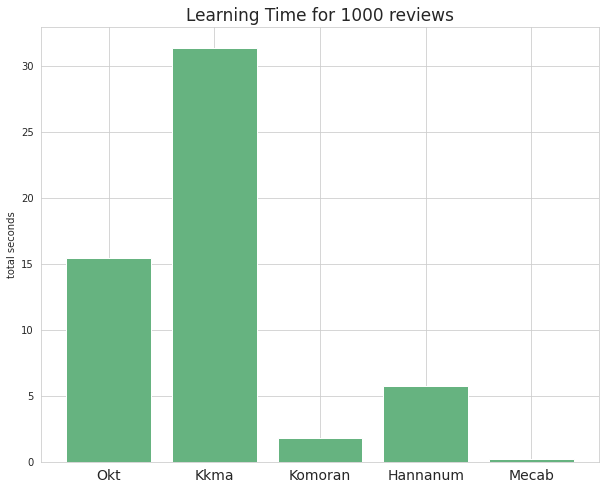

In [20]:
# 형태소 분석 소요 시간 측정
import time
from tqdm import tqdm

def tagger_time(tagger, texts):
  time_sum = 0

  for sentence in tqdm(texts):
    t1 = time.time()
    try:
      tagger.morphs(sentence)
    except:
      pass
    t2 = time.time() 

    time_sum += (t2 - t1)

  return time_sum

texts = review_data['document'][:1000]
time_list = []

for tagger in [okt, kkm, kom, han, mecab]:
  time_list.append(tagger_time(tagger, texts))

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

tagger = ['Okt', 'Kkma', 'Komoran', 'Hannanum', 'Mecab']

plt.figure(figsize=(10,8))
plt.bar(tagger, time_list, color=(0.4,0.7,0.5))
plt.title('Learning Time for 1000 reviews', fontsize=17)
plt.xticks(fontsize=14)
plt.ylabel('total seconds')